In [1]:
import numpy as np

from commons import *
from dataset_loader import load_images, prepare_dataset
from IPython.display import display
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model

# TODO: sprawdzić różne metryki porównania obrazków wynikowych, znaleźć takie, które są najlepsze dla poszczególnych kanałów (czyli lepsza dla wiersza w tej macierzy na dole)


DOTS_SRC = 'hit-images-final2/dot'
TRACKS_SRC = 'hit-images-final2/line'
WORMS_SRC = 'hit-images-final2/worms'
ARTIFACTS_SRC = 'hit-images-final2/artefact'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'



dots_set =  prepare_dataset(load_images(DOTS_SRC))
worms_set =  prepare_dataset(load_images(WORMS_SRC))
tracks_set =  prepare_dataset(load_images(TRACKS_SRC))
artifacts_set =  prepare_dataset(load_images(ARTIFACTS_SRC))

dots_autoencoder = load_model(DOTS_AC)
worms_autoencoder = load_model(WORMS_AC)
tracks_autoencoder = load_model(TRACKS_AC)
artifacts_autoencoder = load_model(ARTIFACTS_AC)

on = {'dots': calc_similarity(dots_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, binarize_for_compare=True),
      'worms': calc_similarity(worms_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, binarize_for_compare=True),
      'tracks': calc_similarity(tracks_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, binarize_for_compare=True),
      'artifacts': calc_similarity(artifacts_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, binarize_for_compare=True)}

Channel dots, compare dots vs tracks, threshold: 6.284502823073559, fp/fn percent: 14.65587044534413 %


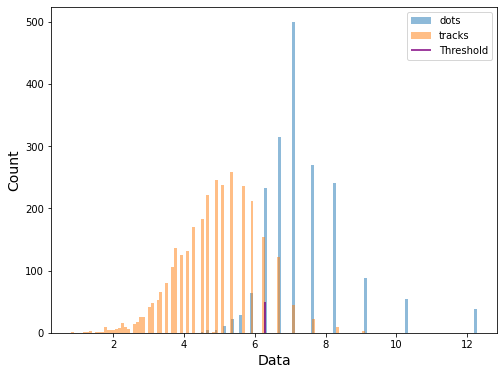

Channel dots, compare dots vs worms, threshold: 5.944251123112446, fp/fn percent: 6.621678616617461 %


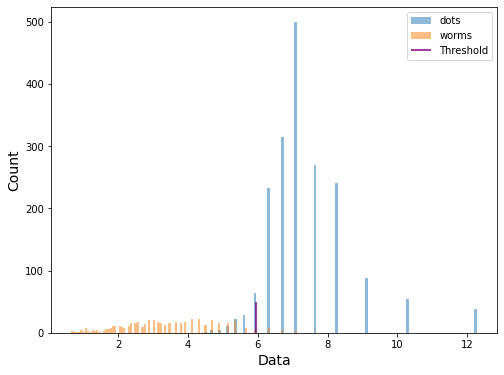

Channel dots, compare dots vs artifacts, threshold: 6.6701945642193685, fp/fn percent: 36.69178897262991 %


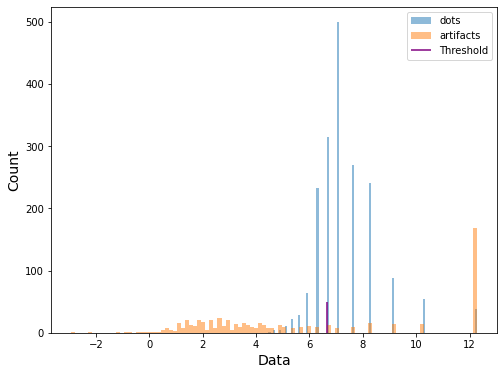

Channel tracks, compare tracks vs dots, threshold: 6.284502823073559, fp/fn percent: 14.65587044534413 %


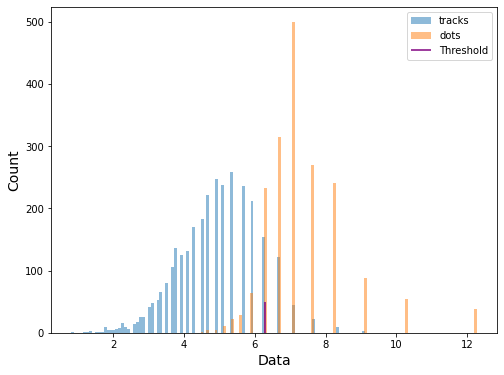

Channel tracks, compare tracks vs worms, threshold: 4.10595783404247, fp/fn percent: 30.89019938219601 %


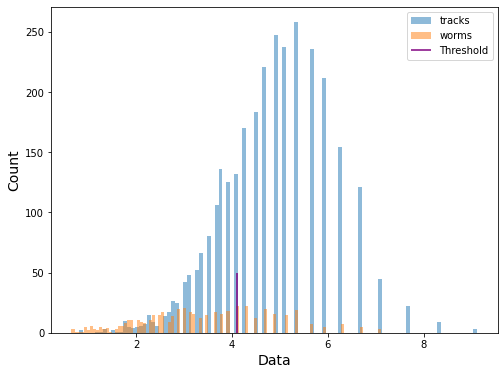

Channel tracks, compare tracks vs artifacts, threshold: 4.667381117085579, fp/fn percent: 49.285906763675555 %


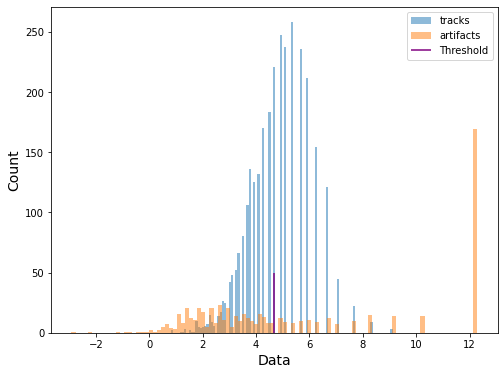

Channel worms, compare worms vs dots, threshold: 5.944251123112446, fp/fn percent: 6.621678616617461 %


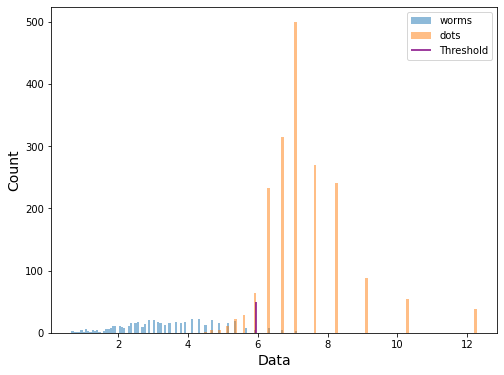

Channel worms, compare worms vs tracks, threshold: 4.10595783404247, fp/fn percent: 30.89019938219601 %


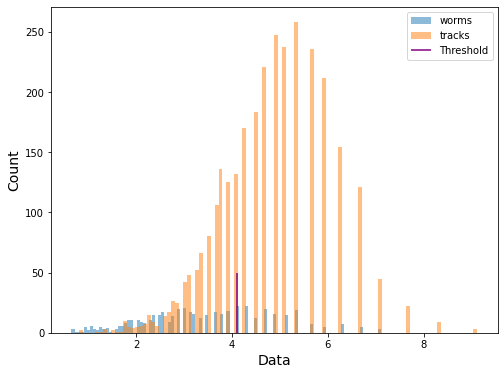

Channel worms, compare worms vs artifacts, threshold: 3.4946371711912763, fp/fn percent: 42.99474605954466 %


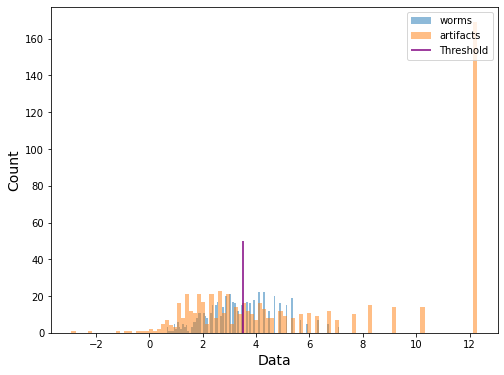

Channel artifacts, compare artifacts vs dots, threshold: 6.6701945642193685, fp/fn percent: 36.69178897262991 %


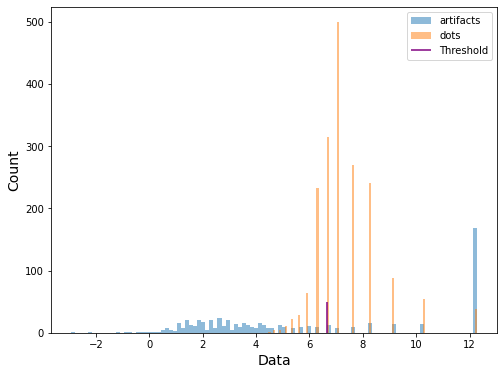

Channel artifacts, compare artifacts vs tracks, threshold: 4.667381117085579, fp/fn percent: 49.285906763675555 %


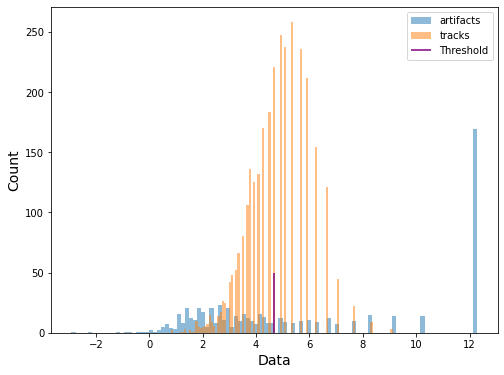

Channel artifacts, compare artifacts vs worms, threshold: 3.4946371711912763, fp/fn percent: 42.99474605954466 %


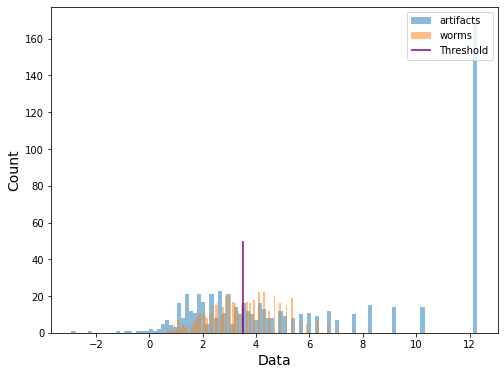

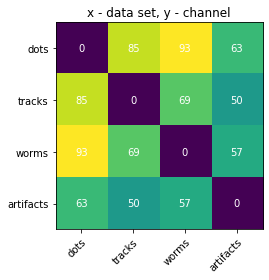

In [2]:
confusion_matrix(on)